In [557]:
import pandas as pd
import numpy as np

In [558]:
df = pd.read_csv('train.csv')
df_t = pd.read_csv('test.csv')

In [559]:
results=pd.DataFrame()
results["PassengerId"]=df_t["PassengerId"]

In [560]:
results.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [561]:
df.shape,df_t.shape

((891, 12), (418, 11))

In [562]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [563]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [564]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [565]:
df_t.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [566]:
df.drop(["PassengerId","Name","Ticket","Fare","Cabin"],axis=1,inplace=True)
df_t.drop(["PassengerId","Name","Ticket","Fare","Cabin"],axis=1,inplace=True)


In [567]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [568]:
import seaborn as sns
import matplotlib.pyplot as plt

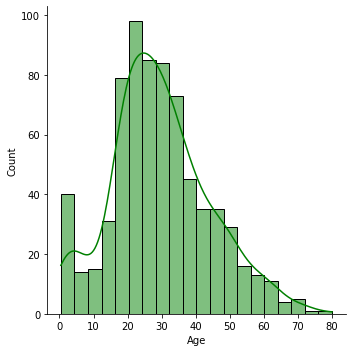

In [569]:
#sns.pairplot(df)
sns.displot(df["Age"],kde=True,color="g")

In [570]:
#data distribution doesn't look normal and its right skewed, to fill missing values considering median for now
#TODO:later during model optimization, will try other options for this missing data
#one option to try out is, to look for parent children column and sibling columns to may be build a model that predicts age based
#on number of siblings and parent children columns
df.Age.fillna(df.Age.median(),inplace=True)
df_t.Age.fillna(df.Age.median(),inplace=True)

In [571]:
df_t.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [572]:
#there are only 2 records that have missing embaked, we can consider for to fill those with frequent occurring embarked value
#TODO:later during model optimization, will try other options for this missing data
df.Embarked.value_counts()
df.Embarked.fillna('S',inplace=True)
df_t.Embarked.fillna('S',inplace=True)

In [573]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [574]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594
std,0.486592,0.836071,13.019697,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


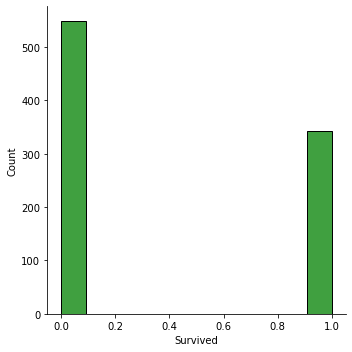

In [575]:
sns.displot(df["Survived"],color="g")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

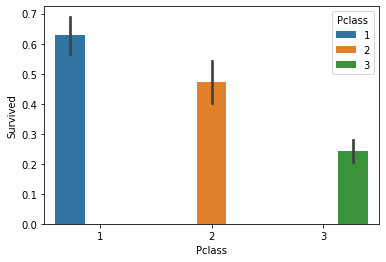

In [576]:
sns.barplot(x="Pclass",y="Survived",data=df,hue=df.Pclass)
#chances of survival by class 1>2>3

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

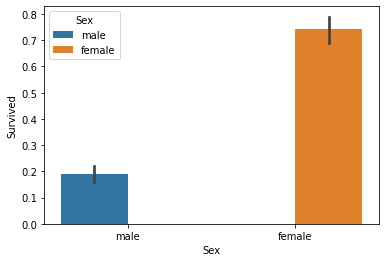

In [577]:
sns.barplot(x="Sex",y="Survived",data=df,hue=df.Sex)
#chances of survival by sex -> female > male

In [578]:
age_grps =[(0,10),(10.1,18),(18.1,30),(30.1,45),(45.1,55),(55.1,100)]
age_grps_df= pd.DataFrame(age_grps)

In [579]:
age_grps_df

,0,1
0,0.0,10
1,10.1,18
2,18.1,30
3,30.1,45
4,45.1,55
5,55.1,100


In [580]:
#TODO: this seems to be a time consuming process, need to revisit
def find_age_group(x):
    #print(x)
    filter1=x.Age>=age_grps_df[0]
    filter2=x.Age<=age_grps_df[1]
    fltr=age_grps_df.where(filter1 & filter2)
    grp_ix= fltr[fltr[0].isna()==False].index[0]
    return grp_ix

def set_age_groups(d_):
    m,n = d_.shape
    lst=[]
    for i in range(m):
        x=d_.iloc[i]
        #print(x)
        lst.append(find_age_group(x))
    d_["Age_Group"]=np.array(lst)
    return d_

In [581]:
df=set_age_groups(df)
df_t=set_age_groups(df_t)



In [582]:
df_t.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_Group
0,3,male,34.5,0,0,Q,3
1,3,female,47.0,1,0,S,4
2,2,male,62.0,0,0,Q,5
3,3,male,27.0,0,0,S,2
4,3,female,22.0,1,1,S,2


<AxesSubplot:xlabel='Age_Group', ylabel='Survived'>

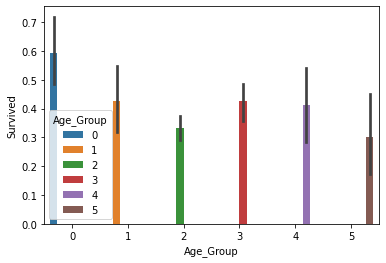

In [583]:
sns.barplot(x="Age_Group",y="Survived",data=df,hue='Age_Group')

<AxesSubplot:xlabel='Age_Group', ylabel='Survived'>

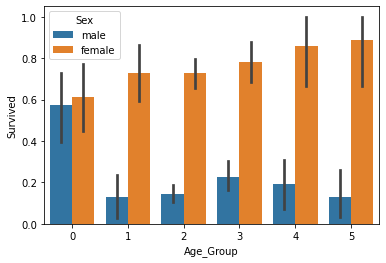

In [584]:
sns.barplot(x="Age_Group",y="Survived",data=df,hue='Sex')
#conclusion drawn:
#1: Sex column would play an important role, as female n all age groups chances > male
#2:kids (age group 0 - 10>=age>=0) have very high survival chances, age group 2 (18 to 30) chances are too low

In [585]:
df.drop(["Age"],axis=1,inplace=True)

In [586]:
df_t.drop(["Age"],axis=1,inplace=True)

In [587]:
df_t.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_Group
0,3,male,0,0,Q,3
1,3,female,1,0,S,4
2,2,male,0,0,Q,5
3,3,male,0,0,S,2
4,3,female,1,1,S,2


In [588]:
df.Sex.replace({
    "male":1,
    "female":0
},inplace=True)

df_t.Sex.replace({
    "male":1,
    "female":0
},inplace=True)

In [589]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group
0,0,3,1,1,0,S,2
1,1,1,0,1,0,C,3
2,1,3,0,0,0,S,2
3,1,1,0,1,0,S,3
4,0,3,1,0,0,S,3


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

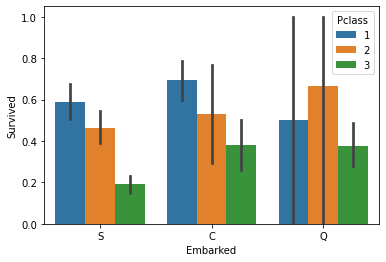

In [590]:
sns.barplot(x="Embarked",y="Survived",data=df,hue="Pclass")
#embarked at C has high chances of survival

In [591]:
df["isAlone"]=df["SibSp"]+df["Parch"]==0
df.isAlone.replace({False:0,True:1},inplace=True)

In [592]:
df_t["isAlone"]=df_t["SibSp"]+df_t["Parch"]==0
df_t.isAlone.replace({False:0,True:1},inplace=True)

In [593]:
df.drop(["SibSp","Parch"],inplace=True,axis=1)
df_t.drop(["SibSp","Parch"],inplace=True,axis=1)

<AxesSubplot:xlabel='isAlone', ylabel='Survived'>

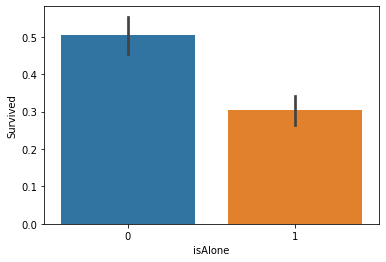

In [594]:
sns.barplot(x="isAlone",y="Survived",data=df)

In [595]:
from sklearn.preprocessing import OneHotEncoder

In [596]:
enc = OneHotEncoder()
mat=enc.fit_transform(df[["Embarked"]]).toarray()

In [597]:
enc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [598]:
df[enc.categories_[0]] = mat

In [599]:
df.head()

,Survived,Pclass,Sex,Embarked,Age_Group,isAlone,C,Q,S
0,0,3,1,S,2,0,0.0,0.0,1.0
1,1,1,0,C,3,0,1.0,0.0,0.0
2,1,3,0,S,2,1,0.0,0.0,1.0
3,1,1,0,S,3,0,0.0,0.0,1.0
4,0,3,1,S,3,1,0.0,0.0,1.0


In [600]:
mat=enc.fit_transform(df_t[["Embarked"]]).toarray()
df_t[enc.categories_[0]] = mat

In [601]:
df.drop(["Embarked"],axis=1,inplace=True)
df_t.drop(["Embarked"],axis=1,inplace=True)

In [602]:
df_t.describe()

,Pclass,Sex,Age_Group,isAlone,C,Q,S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,2.303828,0.605263,0.244019,0.110048,0.645933
std,0.841838,0.481622,1.055321,0.489380,0.430019,0.313324,0.478803
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [603]:
df.head()

,Survived,Pclass,Sex,Age_Group,isAlone,C,Q,S
0,0,3,1,2,0,0.0,0.0,1.0
1,1,1,0,3,0,1.0,0.0,0.0
2,1,3,0,2,1,0.0,0.0,1.0
3,1,1,0,3,0,0.0,0.0,1.0
4,0,3,1,3,1,0.0,0.0,1.0


In [604]:
df.corr()

,Survived,Pclass,Sex,Age_Group,isAlone,C,Q,S
Survived,1.000000,-0.338481,-0.543351,-0.058842,-0.203367,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.131900,-0.341500,0.135207,-0.243292,0.221009,0.074053
Sex,-0.543351,0.131900,1.000000,0.092587,0.303646,-0.082853,-0.074115,0.119224
Age_Group,-0.058842,-0.341500,0.092587,1.000000,0.190492,0.025581,-0.055108,0.012270
isAlone,-0.203367,0.135207,0.303646,0.190492,1.000000,-0.095298,0.086464,0.029074
C,0.168240,-0.243292,-0.082853,0.025581,-0.095298,1.000000,-0.148258,-0.782742
Q,0.003650,0.221009,-0.074115,-0.055108,0.086464,-0.148258,1.000000,-0.499421
S,-0.149683,0.074053,0.119224,0.012270,0.029074,-0.782742,-0.499421,1.000000


In [605]:
features=["Pclass","Sex","Age_Group","isAlone","C","Q","S"]
X_ = df[features]
y_ = df["Survived"]

In [606]:
X_.shape,y_.shape

((891, 7), (891,))

In [607]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [627]:
X_t,X_CV_t,y_t,y_cv_t = train_test_split(X_,y_,test_size=0.25,random_state=5)
clf= tree.DecisionTreeClassifier()
scores = cross_val_score(clf,X_,y_,cv=5)

In [628]:
scores

array([0.76536313, 0.82022472, 0.8258427 , 0.80337079, 0.80898876])

In [629]:
from sklearn.ensemble import RandomForestClassifier

In [630]:
clf= RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clf,X_,y_,cv=5)
scores

array([0.75977654, 0.81460674, 0.80337079, 0.79213483, 0.79775281])

In [631]:
clf=clf.fit(X_t,y_t)

In [632]:
clf.score(X_,y_)

0.8383838383838383

In [646]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [647]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [648]:
clf= XGBClassifier(objective="binary:logistic")
scores = cross_val_score(clf,X_,y_,cv=5)
scores

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 

[00:35:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:35:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:35:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:35:09] WARNING:

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 

array([0.74301676, 0.82022472, 0.81460674, 0.80337079, 0.8258427 ])

In [650]:
grid_cv = GridSearchCV(clf, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_, y_)

[00:35:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [652]:
accuracy_score(y_t,_.predict(X_t))

0.8203592814371258

In [640]:
clf=clf.fit(X_t,y_t)

[00:30:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [642]:
from sklearn.metrics import accuracy_score
accuracy_score(y_t,clf.predict(X_t))

0.8368263473053892

In [643]:
results["Survived"] = clf.predict(df_t[features])

In [644]:
results.to_csv("results.csv",index=False)